In [87]:
from pylab import plot,show
import numpy as np
import pandas as pd
from pylab import plot,show
from numpy import linalg as LA
import math
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import spsolve
from scipy.sparse.linalg import spsolve_triangular
from scipy.sparse import diags
plt.style.use('seaborn-white')

# Acoustic Wave Equation in Time Domain

The elastic wave equation can be stated as follows,
\begin{equation}
\frac{\partial^2 u}{\partial t^2}=c^2 \nabla^2 u+f,\qquad x\in \Omega \subset \mathbb{R}^d,~t\in(T_1,T_2]
\qquad\qquad\qquad\qquad (1)
\end{equation}
where $\Delta$ is *the Laplacian*, $f$ is a *forcing function* (for example our source) and $c$ is *the wave velocity* at which the time and spatially varying wave $u$ propagates.

* [Second-Order Finite-Difference Methods for the One Dimensional Wave Equation](#Second-Order-Finite-Difference-Methods-for-the-One-Dimensional-Wave-Equation)
    * [Explicit Scheme](#Explicit-Scheme)
    * [Implicit Scheme](#Implicit-Scheme)
    * [A fourth-Order Scheme](#A-fourth-Order-Scheme)

## Finite-Difference Methods for the One Dimensional Wave Equation

A one-dimensional for of the wave equation presented in (1) can be found as follows,
$$
\begin{cases}
\dfrac{\partial^2 u}{\partial t^2} = c^2(x) \dfrac{\partial^2 u}{\partial x^2}+f(x,t),&(x,t)\in (a,b)\times(T_1,T_2],\\
u(x,T_1)=g(x),&x\in [a,b],\\
\dfrac{\partial }{\partial t}u(x,T_1) = h(x),&x\in [a,b],\\
u(a,t) = f_a(t),&t \in[T_1,T_2],\\
u(b,t) = f_b(t),&t \in[T_1,T_2].
\end{cases}\qquad \qquad (1)
$$

The following notations are introduced to generate an algorithm for the problem,

* $h=\Delta x=\frac{b-a}{N_x}$ and $\tau=\Delta t=\frac{T_2-T_1}{N_t}$ where $M$ and $N$ are positive integers,
* $u_{i}^{n}=u(ih,n\tau)$, $f_{i}^{n}=f(ih,n\tau)$ for $0\leq i \leq N_x$ and $0\leq n \leq N_t$,
* $c_{i}=c(ih)$ for $0\leq i \leq N_x$ and $\lambda=\frac{\tau}{h}$.

A general form of implicit Finite-Difference scheme of the problem (1) can be written as follows,
$$
\frac{1}{\tau^2}\delta_t^2 u_{i}^{n}=
\frac{1}{h^2}c_{i}^2\left(\alpha \delta_x^2 u_{i}^{n+1} +\beta \delta_x^2 u_{i}^{n} +\gamma \delta_x^2 u_{i}^{n-1}\right)+f_{i}^{n},
$$
where $\delta^2$ is the central difference operator and $\alpha,~\beta$ and $\gamma$ are constants such that $\alpha+\beta+\gamma=1$. It follows that
\begin{align*}
u_{i}^{n+1}-2u_{i}^{n}+u_{i}^{n-1} &= \alpha c_{i}^2 \lambda^2\left(  u_{i+1}^{n+1}-2u_{i}^{n+1}+u_{i-1}^{n+1}\right)
+\beta c_{i}^2 \lambda^2 \left( u_{i+1}^{n} -2 u_{i}^{n}+ u_{i-1}^{n}\right)
+\gamma c_{i}^2 \lambda^2  \left(u_{i+1}^{n-1}-2 u_{i}^{n-1}+u_{i-1}^{n-1}\right)+ \tau^2f_{i}^{n}.
\end{align*}

This also can be simplified as follows,
\begin{align*}
-\alpha c_{i}^2 \lambda^2  \left(u_{i-1}^{n+1}+u_{i+1}^{n+1}\right)+\left(1 +2 \alpha c_{i}^2 \lambda^2 \right)u_{i}^{n+1}&=\beta c_{i}^2 \lambda^2 \left(u_{i-1}^{n}+u_{i+1}^{n} \right)
+2\left(1 -\beta c_{i}^2 \lambda^2 \right)u_{i}^{n}+\gamma c_{i}^2 \lambda^2 \left(u_{i-1}^{n-1}+u_{i+1}^{n-1} \right)
\notag\\ &
-\left(1 +2 \gamma c_{i}^2 \lambda^2 \right)u_{i}^{n-1}+\tau^2f_{i}^{n}.
\qquad
\qquad (2)
\end{align*}

The following matrices are introduced to write down a matrix form of the equation (2),
$$
A=\begin{bmatrix}
1 +2 \alpha c_{1}^2 \lambda^2     &   -\alpha c_{1}^2 \lambda^2          & 0                      & \dots                   &  \dots         &0
\\
-\alpha c_{2}^2 \lambda^2              &1 +2 \alpha c_{2}^2 \lambda^2    & -\alpha c_{2}^2 \lambda^2             & 0                   &  \vdots         &\vdots
\\
0                       &-\alpha c_{3}^2 \lambda^2              &1 +2 \alpha c_{3}^2 \lambda^2    & -\alpha c_{3}^2 \lambda^2               &0         &\vdots
\\
0                       &0            & \ddots                 & \ddots              &\ddots         &\vdots
\\
\vdots                        &\vdots           & -\alpha c_{M-3}^2 \lambda^2             & 1 +2 \alpha c_{M-3}^2 \lambda^2         &-\alpha c_{M-3}^2 \lambda^2  & 0
\\
\vdots                  &\vdots                      & 0                 & -\alpha c_{N_x-2}^2 \lambda^2             & 1 +2 \alpha c_{N_x-2}^2 \lambda^2         &-\alpha c_{N_x-2}^2 \lambda^2
\\
0                       &0                      & \dots                 & 0               & -\alpha c_{N_x-1}^2 \lambda^2     &  1 +2 \alpha c_{N_x-1}^2 \lambda^2
\end{bmatrix},
$$
$$
B=\begin{bmatrix}
2 -2 \beta c_{1}^2 \lambda^2     &   \beta c_{1}^2 \lambda^2          & 0                      & \dots                   &  \dots         &0
\\
\beta c_{2}^2 \lambda^2              &2 -2 \beta c_{2}^2 \lambda^2    & \beta c_{2}^2 \lambda^2             & 0                   &  \vdots         &\vdots
\\
0                       &\beta c_{3}^2 \lambda^2              &2 -2 \beta c_{3}^2 \lambda^2    & \beta c_{3}^2 \lambda^2               &0         &\vdots
\\
0                       &0            & \ddots                 & \ddots              &\ddots         &\vdots
\\
\vdots                        &\vdots           & \beta c_{M-3}^2 \lambda^2             & 2 -2 \beta c_{M-3}^2 \lambda^2         &\beta c_{M-3}^2 \lambda^2  & 0
\\
\vdots                  &\vdots                      & 0                 & \beta c_{N_x-2}^2 \lambda^2             & 2 -2 \beta c_{N_x-2}^2 \lambda^2         &\beta c_{N_x-2}^2 \lambda^2
\\
0                       &0                      & \dots                 & 0               & \beta c_{N_x-1}^2 \lambda^2     &  2 -2 \beta c_{N_x-1}^2 \lambda^2
\end{bmatrix},
$$
$$
C=\begin{bmatrix}
-1-2 \gamma c_{1}^2 \lambda^2     &   \gamma c_{1}^2 \lambda^2          & 0                      & \dots                   &  \dots         &0
\\
\gamma c_{2}^2 \lambda^2              &-1-2 \gamma c_{2}^2 \lambda^2    & \gamma c_{2}^2 \lambda^2             & 0                   &  \vdots         &\vdots
\\
0                       &\gamma c_{3}^2 \lambda^2              &-1-2 \gamma c_{3}^2 \lambda^2    & \gamma c_{3}^2 \lambda^2               &0         &\vdots
\\
0                       &0            & \ddots                 & \ddots              &\ddots         &\vdots
\\
\vdots                        &\vdots           & \gamma c_{M-3}^2 \lambda^2             & -1-2 \gamma c_{M-3}^2 \lambda^2         &\gamma c_{M-3}^2 \lambda^2  & 0
\\
\vdots                  &\vdots                      & 0                 & \gamma c_{N_x-2}^2 \lambda^2             & -1-2 \gamma c_{N_x-2}^2 \lambda^2         &\gamma c_{N_x-2}^2 \lambda^2
\\
0                       &0                      & \dots                 & 0               & \gamma c_{N_x-1}^2 \lambda^2     &  -1-2 \gamma c_{N_x-1}^2 \lambda^2
\end{bmatrix},
$$
and also
$$
\mathbf{u}^n=\begin{bmatrix}
u_{1}^{n} \\
u_{2}^{n}\\
\vdots\\
u_{N_x-2}^{n}\\
u_{N_x-1}^{n}
\end{bmatrix},~
\mathbf{b}^n=
\begin{bmatrix}
c_{1}^2  \lambda^2 \left(\alpha u_{0}^{n+1}+\beta u_{0}^{n}+\gamma u_{0}^{n-1}\right) \\
0\\
\vdots\\
0\\
c_{N_x-1}^2  \lambda^2 \left(\alpha u_{N_x}^{n+1}+\beta u_{N_x}^{n}+\gamma u_{N_x}^{n-1}\right)
\end{bmatrix},~
\mathbf{F}^n=\tau^2
\begin{bmatrix}
f_{1}^{n}\\
f_{2}^{n}\\
\vdots\\
f_{N_x-2}^{n}\\
f_{N_x-1}^{n}
\end{bmatrix}.
$$
Therefore, the following matrix form of equation (2) can be stated based as follows,
$$
A \mathbf{u}^{n+1}=B \mathbf{u}^{n}+C \mathbf{u}^{n-1}+\mathbf{b}^n+\mathbf{F}^n,
$$
which implies
$$
\mathbf{u}^{n+1}=A^{-1}\left(B \mathbf{u}^{n}+C \mathbf{u}^{n-1}+\mathbf{b}^n+ \mathbf{F}^n\right).
$$

Finite differnce method for the wave equation in time usually require computing the solution on the first two time steps. The solution on the second time step, $u(x,T_1+k)$, can be approximated as follows by means of Taylor series,
\begin{align*}
u(x,T_1+\tau)&=u(x,T_1)+u_t(x,T_1)\tau+\frac{1}{2} u_{tt}(x,T_1)\tau^2+\frac{1}{6} u_{ttt}(x,T_1)\tau^3
+\frac{1}{24} u_{tttt}(x,T_1)\tau^4
+\mathcal{O}(\tau^5)
\notag \\ &
=g(x)+s(x)\tau+\frac{1}{2} u_{tt}(x,T_1)\tau^2+\frac{1}{6} u_{ttt}(x,T_1)\tau^3+\frac{1}{24} u_{tttt}(x,T_1)\tau^4+\mathcal{O}(\tau^5)
\notag \\ &
=g(x)+s(x)\tau+\frac{1}{2}[c^2(x) \Delta g(x)+f(x,T_1)]\tau^2
+\frac{1}{6} [c^2(x) \Delta s(x)+f_t(x,T_1)]\tau^3
\notag\\ &
+\frac{1}{24}[c^2(x) \Delta [c^2(x) \Delta g(x)+f(x,T_1)] +f_{tt}(x,T_1)]\tau^4
+\mathcal{O}(\tau^5).
\end{align*}

### Explicit Scheme

First, consider $\alpha=\gamma=0$ and $\beta=1$ in the equation (2) to get an **explicit** form of the algorithm.

### Implicit Scheme

Similarly, consider $\alpha=\gamma=\frac{1}{4}$ and $\beta=\frac{1}{2}$ in the equation (2) to get an **implicit** form of the algorithm.

For Stability and convergence analyses, see this [file](https://hatefdastour.github.io/files/FDTD/Stability_and_Convergence_FDTD_2nd_1D.pdf).

## A fourth-Order Scheme

A higher-order scheme can be introduced as follows (the readers are encouraged to see [[Liao, 2008](https://www.sciencedirect.com/science/article/abs/pii/S0096300308007042)]),
$$
\label{eq1A5.01}\left(1+\frac{1^2}{12}\delta_t^2\right)^{-1}\frac{\delta_t^2}{\tau^2} u_{i}^{n}=
c^2_i \left(1+\frac{1}{12}\delta_x^2\right)^{-1}\frac{\delta_x^2}{h^2} u_{i}^{n}+f_{i}^{n},
$$
where it will be shown that this scheme is 4th-order.

In this section, the scheme is analyzed and also an numerical algorithm is generated. This equation can be also written in the following form,
$$
\left(1+\frac{1}{12}\delta_x^2\right)\frac{\delta_t^2}{\tau^2} \frac{u_{i}^{n}}{c^2_i}=
\left(1+\frac{1}{12}\delta_t^2\right)\frac{\delta_x^2}{h^2} u_{i}^{n}
+\left(1+\frac{1}{12}\delta_t^2\right)\left(1+\frac{1}{12}\delta_x^2\right)\frac{f_{i}^{n}}{c^2_i}.
\qquad \qquad (13)
$$
The left hand side of the equation (13) can be expanded as follows,
$$
\left(1+\frac{1}{12}\delta_x^2\right)\frac{\delta_t^2}{\tau^2} \frac{u_{i}^{n}}{c^2_i}=
\frac{1}{12\tau^2}\left[ \left(\frac{u_{i+1}^{n+1}}{c^2_{i+1}}+10 \frac{u_{i}^{n+1}}{c^2_{i}} + \frac{u_{i-1}^{n+1}}{c^2_{i-1}}\right)
-2\left(\frac{u_{i+1}^{n}}{c^2_{i+1}}+10 \frac{u_{i}^{n}}{c^2_{i}} + \frac{u_{i-1}^{n}}{c^2_{i-1}}\right)
+\left(\frac{u_{i+1}^{n-1}}{c^2_{i+1}}+10 \frac{u_{i}^{n-1}}{c^2_{i}} + \frac{u_{i-1}^{n-1}}{c^2_{i-1}}\right)\right].
$$

It follows that,
\begin{align*}
\left[\frac{u_{i+1}^{n+1}}{c^2_{i+1}}+10 \frac{u_{i}^{n+1}}{c^2_{i}} + \frac{u_{i-1}^{n+1}}{c^2_{i-1}}\right]
-2 \left[\frac{u_{i+1}^{n}}{c^2_{i+1}}+10 \frac{u_{i}^{n}}{c^2_{i}} + \frac{u_{i-1}^{n}}{c^2_{i-1}}\right]
+\left[\frac{u_{i+1}^{n-1}}{c^2_{i+1}}+10 \frac{u_{i}^{n-1}}{c^2_{i}} + \frac{u_{i-1}^{n-1}}{c^2_{i-1}}\right]&=
\lambda^2\left[u_{i+1}^{n+1}-2 u_{i}^{n+1} + u_{i-1}^{n+1}\right]+10\lambda^2\left[u_{i+1}^{n}-2u_{i}^{n} + u_{i-1}^{n}\right]
\notag\\ &
+\lambda^2 \left[u_{i+1}^{n-1}-2u_{i}^{n-1} + u_{i-1}^{n-1}\right]
+\tau^2\mathbf{F}_{i}^{n}.
\qquad \qquad (14)
\end{align*}

where
$$\mathbf{F}_{i}^{n}=
\frac{1}{144}\left[\frac{1}{c^2_{i+1}}\left(f_{i+1}^{n+1}+10 f_{i+1}^{n}+f_{i+1}^{n-1}\right)
+\frac{10}{c^2_{i}}(f_{i}^{n+1}+10f_{i}^{n}+f_{i}^{n-1})+\frac{1}{c^2_{i-1}}(f_{i-1}^{n+1}+10f_{i-1}^{n}+f_{i-1}^{n-1})\right]
$$
The equation (14) can be simplified as follows,

\begin{align*}
\left(\frac{1}{c^2_{i+1}}-\lambda^2\right)u_{i+1}^{n+1}+\left(\frac{10}{c^2_{i}}+2\lambda^2\right)u_{i}^{n+1}+\left(\frac{1}{c^2_{i-1}}-\lambda^2\right)u_{i-1}^{n+1}
&=
\left(\frac{2}{c^2_{i+1}}+10\lambda^2\right)u_{i+1}^{n}+\left(\frac{20}{c^2_{i}}-20\lambda^2\right)u_{i}^{n}
+\left(\frac{2}{c^2_{i-1}}+10\lambda^2\right)u_{i-1}^{n}
\notag \\ &
-\left(\frac{1}{c^2_{i+1}}-\lambda^2\right)u_{i+1}^{n-1}
-\left(\frac{10}{c^2_{i}}+2\lambda^2\right)u_{i}^{n-1}-\left(\frac{1}{c^2_{i-1}}-\lambda^2\right)u_{i-1}^{n-1}
+\tau^2\mathbf{F}_{i}^{n}.
\end{align*}

Consider the following matrices,
$$
A=\begin{bmatrix}
\frac{10}{c^2_{1}}+2\lambda^2 & \frac{1}{c^2_{2}}-\lambda^2 & 0 & 0 &\dots & \dots &0 \\
\frac{1}{c^2_{1}}-\lambda^2 & \frac{10}{c^2_{2}}+2\lambda^2 & \frac{1}{c^2_{3}}-\lambda^2 & 0 &  0 &\dots &\vdots \\
0 & \frac{1}{c^2_{2}}-\lambda^2 & \frac{10}{c^2_{3}}+2\lambda^2 & \frac{1}{c^2_{4}}-\lambda^2 & 0 & \dots &\vdots \\
0 & 0& \ddots & \ddots & \ddots & 0 & \vdots \\
\vdots & \dots &0 & \frac{1}{c^2_{M-4}}-\lambda^2 & \frac{10}{c^2_{M-3}}+2\lambda^2 & \frac{1}{c^2_{N_x-2}}-\lambda^2 & 0\\
\vdots & \dots & 0 &0 & \frac{1}{c^2_{M-3}}-\lambda^2 & \frac{10}{c^2_{N_x-2}}+2\lambda^2 & \frac{1}{c^2_{N_x-1}}-\lambda^2 \\
0 & \dots & \dots & 0 &0 & \frac{1}{c^2_{N_x-2}}-\lambda^2 & \frac{10}{c^2_{N_x-1}}+2\lambda^2\\
\end{bmatrix},
$$
$$
B=\begin{bmatrix}
\frac{20}{c^2_{1}}-20\lambda^2 & \frac{2}{c^2_{2}}+10\lambda^2 & 0 & 0 &\dots & \dots &0 \\
\frac{2}{c^2_{1}}+10\lambda^2 & \frac{20}{c^2_{2}}-20\lambda^2 & \frac{2}{c^2_{3}}+10\lambda^2 & 0 &  0 &\dots &\vdots \\
0 & \frac{2}{c^2_{2}}+10\lambda^2 & \frac{20}{c^2_{3}}-20\lambda^2 & \frac{2}{c^2_{4}}+10\lambda^2 & 0 & 0 &\vdots \\
0 & 0& \ddots & \ddots & \ddots & 0 & \vdots \\
\vdots & \dots &0 & \frac{2}{c^2_{M-4}}+10\lambda^2 & \frac{20}{c^2_{M-3}}-20\lambda^2 & \frac{2}{c^2_{N_x-2}}+10\lambda^2 & 0\\
\vdots & \dots & 0 &0 & \frac{2}{c^2_{M-3}}+10\lambda^2 & \frac{20}{c^2_{N_x-2}}-20\lambda^2 & \frac{2}{c^2_{N_x-1}}+10\lambda^2 \\
0 & \dots & \dots & 0 &0 & \frac{2}{c^2_{N_x-2}}+10\lambda^2 & \frac{20}{c^2_{N_x-1}}-20\lambda^2\\
\end{bmatrix},
$$
$$
C=-A
$$
and also
$$
\textbf{u}^n=\begin{bmatrix}
u_{1}^{n} \\
u_{2}^{n}\\
\vdots\\
u_{N_x-2}^{n}\\
u_{N_x-1}^{n}
\end{bmatrix},~
\textbf{b}^n=
\begin{bmatrix}
-\left(\frac{1}{c^2_{0}}-\lambda^2\right)f_{a}^{n+1}+\left(\frac{2}{c^2_{0}}+10\lambda^2\right)f_{a}^{n}
-\left(\frac{1}{c^2_{0}}-\lambda^2\right)f_{a}^{n-1}\\
0\\
\vdots\\
0\\
-\left(\frac{1}{c^2_{N_x}}-\lambda^2\right)f_{b}^{n+1}+\left(\frac{2}{c^2_{N_x}}+10\lambda^2\right)f_{b}^{n}
-\left(\frac{1}{c^2_{0}}-\lambda^2\right)f_{b}^{n-1} \\
\end{bmatrix},
 \textbf{F}^n=\tau^2
\begin{bmatrix}
\mathbf{F}_{1}^{n}\\
\mathbf{F}_{2}^{n}\\
\vdots\\
\mathbf{F}_{N_x-2}^{n}\\
\mathbf{F}_{N_x-1}^{n}
\end{bmatrix}.
$$
Therefore, the presented scheme can be expressed in the following matrix form,
$$
\textbf{u}^{n+1}=A^{-1}\left(B \textbf{u}^{n}+C \textbf{u}^{n-1}+\textbf{b}^n+ \textbf{F}^n\right).
$$

For Stability and convergence analyses, see this [file](https://hatefdastour.github.io/files/FDTD/Stability_and_Convergence_FDTD_4nd_1D.pdf).

In [4]:
def Example01_ExSolver1D(Nx,Nt):
    # N = the number of mesh points for space
    # Nt = the number of mesh points for time
    # [a,b] and [T1,T2]
    a = 0.0
    b = 1.0
    T1 = 0.0
    T2 = 1.0
    # Functions
    C2 =lambda x: np.exp(-x)
    g=lambda x: np.exp(x)
    h=lambda x: np.exp(x)
    fa=lambda t: np.exp(t)
    fb=lambda t: np.exp(t+1)
    f=lambda x,t: np.exp(t + x) - np.exp(t)
    Ue=lambda x,t: np.exp(x+t)
    # Additional functions
    gxx=lambda x: np.exp(x);
    gxxxx=lambda x: np.exp(x);
    hxx=lambda x: np.exp(x);
    ft=lambda x,t: np.exp(t + x) - np.exp(t);
    ftt=lambda x,t: np.exp(t + x) - np.exp(t);
    # dx, dt and lambda^2
    dx =(b-a)/Nx
    dt =(T2-T1)/Nt
    l2=(dt/dx)**2
    # discretizing [a,b] and [T1,T2]
    xx=np.linspace(a, b, Nx+1)
    tt=np.linspace(T1, T2, Nt+1)
    # dicretizing c^2(x)
    CC=C2(xx)
    # u initial time value
    u0 = g(xx);
    u=np.zeros(Nx+1, dtype=float)
    u1=np.zeros(Nx+1, dtype=float)
    # Computing the solution at the first time step
    GG= g(xx)+h(xx)*dt+0.5*(C2(xx)*gxx(xx)+f(xx,T1))*(dt**2)+\
    (1/6)*(C2(xx)*hxx(xx)+ft(xx,T1))*(dt**3)+(1/24)*(C2(xx)*gxxxx(xx)+ftt(xx,T1))*(dt**4)
    u1[1:Nx]=GG[1:Nx]
    u1[0]=fa(tt[1])
    u1[Nx]=fb(tt[1])
    mid=list(range(1,Nx))
    midp=[i+1 for i in mid]
    midm=[i-1 for i in mid]
    # for loop
    for n in range(1,Nt):
        u=np.zeros(Nx+1, dtype=float)
        u[mid]=l2*CC[mid]*(u1[midp]-2*u1[mid]+u1[midm])+2*u1[mid]-u0[mid]+(dt**2)*f(xx[mid],tt[n])
        u[0]=fa(tt[n+1])
        u[Nx]=fb(tt[n+1])
        u0=u1
        u1=u
    # end of the loop
    # Norm
    Uexact=Ue(xx,tt[Nt])
    Norm=LA.norm(u-Uexact, np.inf)
    return Norm, u, Uexact

**Explicit scheme**:
The results of analyzing the numerical solution of the problem using the explicit scheme is available at following tables 

In [6]:
it=4
Norm=np.zeros(it, dtype=float)
Nx0=10;
Nt0=200;
Nx=np.asarray([Nx0*2**n for n in range(0,it)])
Nt=np.asarray([Nt0 for n in range(0,it)])
Ratio=np.zeros(it, dtype=float)
LOG=np.zeros(it, dtype=float)
# iteration
for n in range(it):
    Norm[n],_,_ =Example01_ExSolver1D(Nx[n],Nt[n])
    if (n>0):
        Ratio[n]=Norm[n-1]/Norm[n]
        LOG[n]=math.log(Ratio[n],2)
        
data = pd.DataFrame({'Nx': Nx, 'Nt': Nt, 'Norm': Norm, 'Ratio': Ratio, 'Log': LOG})
data

,Nx,Nt,Norm,Ratio,Log
0,10,200,0.000477,0.000000,0.000000
1,20,200,0.000119,4.018871,2.006790
2,40,200,0.000028,4.226541,2.079477
3,80,200,0.000005,5.187090,2.374925


In [7]:
it=4
Norm=np.zeros(it, dtype=float)
Nx0=10;
Nt0=20;
Nx=np.asarray([Nx0*2**n for n in range(0,it)])
Nt=np.asarray([Nt0*2**n for n in range(0,it)])
Ratio=np.zeros(it, dtype=float)
LOG=np.zeros(it, dtype=float)
# iteration
for n in range(it):
    Norm[n],_,_ =Example01_ExSolver1D(Nx[n],Nt[n])
    if (n>0):
        Ratio[n]=Norm[n-1]/Norm[n]
        LOG[n]=math.log(Ratio[n],2)
        
data = pd.DataFrame({'Nx': Nx, 'Nt': Nt, 'Norm': Norm, 'Ratio': Ratio, 'Log': LOG})
data

,Nx,Nt,Norm,Ratio,Log
0,10,20,0.000265,0.000000,0.000000
1,20,40,0.000067,3.965520,1.987510
2,40,80,0.000017,3.987502,1.995485
3,80,160,0.000004,3.991334,1.996871


What stands out from the tables is that the order of the method respect to both in space and time is 2.

In [9]:
it=4
Norm=np.zeros(it, dtype=float)
Nx0=10;
Nt0=8;
Nx=np.asarray([Nx0*2**n for n in range(0,it)])
Nt=np.asarray([Nt0*2**n for n in range(0,it)])
Ratio=np.zeros(it, dtype=float)
LOG=np.zeros(it, dtype=float)
# iteration
for n in range(it):
    Norm[n],_,_ =Example01_ExSolver1D(Nx[n],Nt[n])
    if (n>0):
        Ratio[n]=Norm[n-1]/Norm[n]
        LOG[n]=math.log(Ratio[n],2)
        
data = pd.DataFrame({'Nx': Nx, 'Nt': Nt, 'Norm': Norm, 'Ratio': Ratio, 'Log': LOG})
data

,Nx,Nt,Norm,Ratio,Log
0,10,8,8.407262e-04,0.000000e+00,0.000000
1,20,16,3.312714e-02,2.537877e-02,-5.300234
2,40,32,1.302596e+06,2.543163e-08,-25.228801
3,80,64,1.578489e+23,8.252172e-18,-56.749932


In addition, table highlights the  result of the experiment in which the stability criteria was violated.

**Implicit scheme**:
The results of analyzing the numerical solution of the problem using the implicit scheme with $\alpha=\gamma=\frac{1}{4}$ and $\beta=\frac{1}{2}$ is available at the following tables

In [11]:
def Example01_ImSolver1D(Nx,Nt):
    # Nx = the number of mesh points for space
    # Nt = the number of mesh points for time
    # alpha, beta and gamma
    alpha=1/4
    beta=1/2
    gamma=1/4
    # [a,b] and [T1,T2]
    a = 0.0
    b = 1.0
    T1 = 0.0
    T2 = 1.0
    # Functions
    C2 =lambda x: np.exp(-x)
    g=lambda x: np.exp(x)
    h=lambda x: np.exp(x)
    fa=lambda t: np.exp(t)
    fb=lambda t: np.exp(t+1)
    f=lambda x,t: np.exp(t + x) - np.exp(t)
    Ue=lambda x,t: np.exp(x+t)
    # Additional functions
    gxx=lambda x: np.exp(x);
    gxxxx=lambda x: np.exp(x);
    hxx=lambda x: np.exp(x);
    ft=lambda x,t: np.exp(t + x) - np.exp(t);
    ftt=lambda x,t: np.exp(t + x) - np.exp(t);
    # dx, dt and lambda^2
    dx =(b-a)/Nx
    dt =(T2-T1)/Nt
    l2=(dt/dx)**2
    # discretizing [a,b] and [T1,T2]
    xx=np.linspace(a, b, Nx+1)
    tt=np.linspace(T1, T2, Nt+1)
    # dicretizing c^2(x)
    CC=C2(xx)
    # u initial time value
    u0 = g(xx);
    u=np.zeros(Nx+1, dtype=float)
    u1=np.zeros(Nx+1, dtype=float)
    # Computing the solution at the first time step
    GG= g(xx)+h(xx)*dt+0.5*(C2(xx)*gxx(xx)+f(xx,T1))*(dt**2)+\
    (1/6)*(C2(xx)*hxx(xx)+ft(xx,T1))*(dt**3)+(1/24)*(C2(xx)*gxxxx(xx)+ftt(xx,T1))*(dt**4)
    u1[1:Nx]=GG[1:Nx]
    u1[0]=fa(tt[1])
    u1[Nx]=fb(tt[1])
    # indeces
    mid=list(range(1,Nx))
    sup=list(range(1,Nx-1))
    sub=list(range(2,Nx))
    # Matrix A
    A=diags([-alpha*CC[sub]*l2,1+2*alpha*CC[mid]*l2,-alpha*CC[sup]*l2], [-1,0,1])
    # Matrix B
    B=diags([beta*CC[sub]*l2,2-2*beta*CC[mid]*l2,beta*CC[sup]*l2], [-1,0,1])
    # Matrix C
    C=diags([gamma*CC[sub]*l2,-1-2*gamma*CC[mid]*l2,gamma*CC[sup]*l2], [-1,0,1])
    # Fa and Fb
    FA= fa(tt)
    FB= fb(tt)
    for n in range(1,Nt):
        u=np.zeros(Nx+1, dtype=float)
        bb=np.zeros(len(mid), dtype=float)
        bb[0]=CC[1]*l2*(alpha*FA[n+1]+beta*FA[n]+gamma*FA[n-1])
        bb[Nx-2]=CC[Nx-1]*l2*(alpha*FB[n+1]+beta*FB[n]+gamma*FB[n-1])
        u[mid]=spsolve(A,B*u1[mid]+C*u0[mid]+bb+(dt**2)*f(xx[mid],tt[n]))
        u[0]=fa(tt[n+1])
        u[Nx]=fb(tt[n+1])
        u0=u1
        u1=u
    # end of the loop
    # Norm
    Uexact=Ue(xx,tt[Nt])
    Norm=LA.norm(u-Uexact, np.inf)
    return Norm, u, Uexact

In [13]:
it=4
Norm=np.zeros(it, dtype=float)
Nx0=10;
Nt0=200;
Nx=np.asarray([Nx0*2**n for n in range(0,it)])
Nt=np.asarray([Nt0 for n in range(0,it)])
Ratio=np.zeros(it, dtype=float)
LOG=np.zeros(it, dtype=float)
# iteration
for n in range(it):
    Norm[n],_,_ =Example01_ImSolver1D(Nx[n],Nt[n])
    if (n>0):
        Ratio[n]=Norm[n-1]/Norm[n]
        LOG[n]=math.log(Ratio[n],2)
        
data = pd.DataFrame({'Nx': Nx, 'Nt': Nt, 'Norm': Norm, 'Ratio': Ratio, 'Log': LOG})
data

,Nx,Nt,Norm,Ratio,Log
0,10,200,0.000480,0.000000,0.000000
1,20,200,0.000122,3.929173,1.974226
2,40,200,0.000032,3.857149,1.947535
3,80,200,0.000009,3.507299,1.810361


In [14]:
it=4
Norm=np.zeros(it, dtype=float)
Nx0=200;
Nt0=10;
Nx=np.asarray([Nx0 for n in range(0,it)])
Nt=np.asarray([Nt0*2**n for n in range(0,it)])
Ratio=np.zeros(it, dtype=float)
LOG=np.zeros(it, dtype=float)
# iteration
for n in range(it):
    Norm[n],_,_ =Example01_ImSolver1D(Nx[n],Nt[n])
    if (n>0):
        Ratio[n]=Norm[n-1]/Norm[n]
        LOG[n]=math.log(Ratio[n],2)
        
data = pd.DataFrame({'Nx': Nx, 'Nt': Nt, 'Norm': Norm, 'Ratio': Ratio, 'Log': LOG})
data

,Nx,Nt,Norm,Ratio,Log
0,200,10,0.000582,0.000000,0.000000
1,200,20,0.000149,3.917749,1.970025
2,200,40,0.000038,3.883177,1.957238
3,200,80,0.000010,3.646092,1.866351


It can be seen that the order of the method respect to both in space and time is 2.

Furthermore, the implicit method is unconditionally stable. This can be clearly seen from the tables.

**The Fourth-order scheme**: The results of analyzing the numerical solution of the problem, using the explicit scheme, is available at the following tables.

In [15]:
def Example01_4thSolver1D(Nx,Nt):
    # Nx = the number of mesh points for space
    # Nt = the number of mesh points for time
    # [a,b] and [T1,T2]
    a = 0.0
    b = 1.0
    T1 = 0.0
    T2 = 1.0
    # Functions
    C2 =lambda x: np.exp(-x)
    g=lambda x: np.exp(x)
    h=lambda x: np.exp(x)
    fa=lambda t: np.exp(t)
    fb=lambda t: np.exp(t+1)
    f=lambda x,t: np.exp(t + x) - np.exp(t)
    Ue=lambda x,t: np.exp(x+t)
    # Additional functions
    gxx=lambda x: np.exp(x);
    gxxxx=lambda x: np.exp(x);
    hxx=lambda x: np.exp(x);
    ft=lambda x,t: np.exp(t + x) - np.exp(t);
    ftt=lambda x,t: np.exp(t + x) - np.exp(t);
    # dx, dt and lambda^2
    dx =(b-a)/Nx
    dt =(T2-T1)/Nt
    l2=(dt/dx)**2
    # discretizing [a,b] and [T1,T2]
    xx=np.linspace(a, b, Nx+1)
    tt=np.linspace(T1, T2, Nt+1)
    # dicretizing c^2(x)
    CC=C2(xx)
    # u initial time value
    u0 = g(xx);
    u=np.zeros(Nx+1, dtype=float)
    u1=np.zeros(Nx+1, dtype=float)
    # Computing the solution at the first time step
    GG= g(xx)+h(xx)*dt+0.5*(C2(xx)*gxx(xx)+f(xx,T1))*(dt**2)+\
    (1/6)*(C2(xx)*hxx(xx)+ft(xx,T1))*(dt**3)+(1/24)*(C2(xx)*gxxxx(xx)+ftt(xx,T1))*(dt**4)
    u1[1:Nx]=GG[1:Nx]
    u1[0]=fa(tt[1])
    u1[Nx]=fb(tt[1])
    # indeces
    mid=list(range(1,Nx))
    sub=list(range(1,Nx-1))
    sup=list(range(2,Nx))
    midp=[i+1 for i in mid]
    midm=[i-1 for i in mid]
    # Matrix A
    A=diags([(1/CC[sub])-l2,(10/CC[mid])+2*l2,(1/CC[sup])-l2], [-1,0,1])
    # Matrix B
    B=diags([(2/CC[sub])+10*l2,(20/CC[mid])-20*l2,(2/CC[sup])+10*l2], [-1,0,1])
    # Matrix C
    C=-A
    # Fa and Fb
    FA= fa(tt)
    FB= fb(tt)
    for n in range(1,Nt):
        FF=((dt**2)/12)*((1/CC[midp])*(f(xx[midp],tt[n+1])+10*f(xx[midp],tt[n])+f(xx[midp],tt[n-1]))+\
        (10/CC[mid])*(f(xx[mid],tt[n+1])+10*f(xx[mid],tt[n])+f(xx[mid],tt[n-1]))+\
        (1/CC[midm])*(f(xx[midm],tt[n+1])+10*f(xx[midm],tt[n])+f(xx[midm],tt[n-1])))
        u=np.zeros(Nx+1, dtype=float)
        bb=np.zeros(len(mid), dtype=float)
        bb[0]=-(1/CC[0]-l2)*FA[n+1]+(2/CC[0]+10*l2)*FA[n]-(1/CC[0]-l2)*FA[n-1]
        bb[Nx-2]=-(1/CC[Nx]-l2)*FB[n+1]+(2/CC[Nx]+10*l2)*FB[n]-(1/CC[Nx]-l2)*FB[n-1]
        u[mid]=spsolve(A,B*u1[mid]+C*u0[mid]+bb+FF)
        u[0]=fa(tt[n+1])
        u[Nx]=fb(tt[n+1])
        u0=u1
        u1=u
        del FF
    # end of the loop
    # Norm
    Uexact=Ue(xx,tt[Nt])
    Norm=LA.norm(u-Uexact, np.inf)
    return Norm, u, Uexact

In [17]:
it=4
Norm=np.zeros(it, dtype=float)
Nx0=10;
Nt0=200;
Nx=np.asarray([Nx0*2**n for n in range(0,it)])
Nt=np.asarray([Nt0 for n in range(0,it)])
Ratio=np.zeros(it, dtype=float)
LOG=np.zeros(it, dtype=float)
# iteration
for n in range(it):
    Norm[n],_,_ =Example01_4thSolver1D(Nx[n],Nt[n])
    if (n>0):
        Ratio[n]=Norm[n-1]/Norm[n]
        LOG[n]=math.log(Ratio[n],2)
        
data = pd.DataFrame({'Nx': Nx, 'Nt': Nt, 'Norm': Norm, 'Ratio': Ratio, 'Log': LOG})
data

,Nx,Nt,Norm,Ratio,Log
0,10,200,2.401867e-07,0.000000,0.000000
1,20,200,1.510757e-08,15.898436,3.990813
2,40,200,9.358994e-10,16.142298,4.012774
3,80,200,6.068035e-11,15.423434,3.947052


In [19]:
it=4
Norm=np.zeros(it, dtype=float)
Nx0=10;
Nt0=20;
Nx=np.asarray([Nx0*2**n for n in range(0,it)])
Nt=np.asarray([Nt0*2**n for n in range(0,it)])
Ratio=np.zeros(it, dtype=float)
LOG=np.zeros(it, dtype=float)
# iteration
for n in range(it):
    Norm[n],_,_ =Example01_4thSolver1D(Nx[n],Nt[n])
    if (n>0):
        Ratio[n]=Norm[n-1]/Norm[n]
        LOG[n]=math.log(Ratio[n],2)
        
data = pd.DataFrame({'Nx': Nx, 'Nt': Nt, 'Norm': Norm, 'Ratio': Ratio, 'Log': LOG})
data

,Nx,Nt,Norm,Ratio,Log
0,10,20,2.417616e-07,0.000000,0.000000
1,20,40,1.519881e-08,15.906617,3.991555
2,40,80,9.521637e-10,15.962389,3.996605
3,80,160,5.941558e-11,16.025487,4.002296


Moreover, for a fixed $N_t=200$, we have

In [90]:
it=4
Norm=np.zeros(it, dtype=float)
Nx0=10
Nt0=200
Nx=np.asarray([Nx0*2**n for n in range(0,it)])
Nt=np.asarray([Nt0 for n in range(0,it)])
#
Exact=np.zeros((it,Nx0+1), dtype=float)
Explicit_Scheme=np.zeros((it,Nx0+1), dtype=float)
Implicit_Scheme=np.zeros((it,Nx0+1), dtype=float)
Fourth_order_Scheme=np.zeros((it,Nx0+1), dtype=float)
#
for n in range(it):
    _,temp,temp1 =Example01_ExSolver1D(Nx[n],Nt[n])
    Exact[n,:]=temp1[0:(Nx[n]+1):(2**n)]
    Explicit_Scheme[n,:]=temp[0:(Nx[n]+1):(2**n)]
    del temp, temp1
    _,temp,_ =Example01_ImSolver1D(Nx[n],Nt[n])
    Implicit_Scheme[n,:]=temp[0:(Nx[n]+1):(2**n)]
    del temp
    _,temp,_ =Example01_4thSolver1D(Nx[n],Nt[n])
    Fourth_order_Scheme[n,:]=temp[0:(Nx[n]+1):(2**n)]

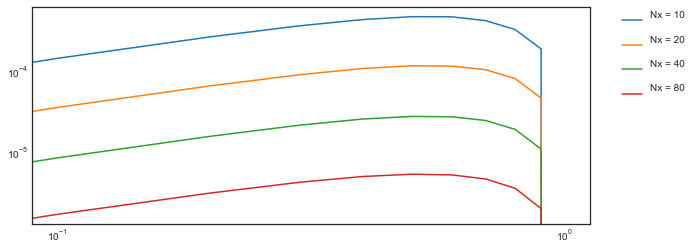

In [126]:
plt.figure(figsize = (10, 4))
for n in range(it):
    tag="Nx = %d\n" % (Nx[n])
    plt.loglog(np.linspace(0, 1, Nx0+1), np.abs(Exact[n,:]-Explicit_Scheme[n,:]),label=tag)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

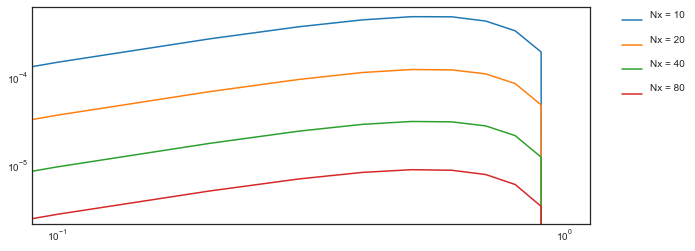

In [128]:
plt.figure(figsize = (10, 4))
for n in range(it):
    tag="Nx = %d\n" % (Nx[n])
    plt.loglog(np.linspace(0, 1, Nx0+1), np.abs(Exact[n,:]-Implicit_Scheme[n,:]),label=tag)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

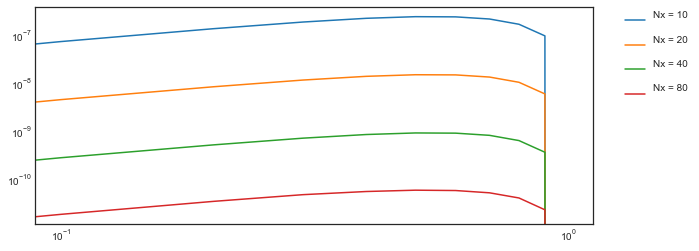

In [129]:
plt.figure(figsize = (10, 4))
for n in range(it):
    tag="Nx = %d\n" % (Nx[n])
    plt.loglog(np.linspace(0, 1, Nx0+1), np.abs(Exact[n,:]-Fourth_order_Scheme[n,:]),label=tag)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)